In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np

import h5py

import matplotlib as mpl

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os

os.environ["CUDA_VISIBLE_DEVICES"] = '1'  

from keras.backend.tensorflow_backend import set_session
# import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.Session(config=config)
set_session(sess)  # set this TensorFlow session as the default session for Keras

Using TensorFlow backend.


In [2]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import Normalize

## This code comes from sliceplot.py of 21cmFAST
################################################

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


cmap = LinearSegmentedColormap.from_list('mycmap', ['yellow','red','black','green','blue'])
norm = MidpointNormalize(midpoint=0)

from tensorflow.keras import models

In [3]:
# model = load_model("/home/zoshs2/tf_gpu/Re/BS1_BW02_RGB/1th_CheckPointModels/77-0.0002.hdf5")
model = load_model("/home/zoshs2/tf_gpu/Re/BS3_BW02_RGB/4th_CheckPointModels/92-0.0003.hdf5")

W0522 14:41:53.480739 139772147357504 deprecation.py:506] From /home/zoshs2/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0522 14:41:53.482562 139772147357504 deprecation.py:506] From /home/zoshs2/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0522 14:41:53.484116 139772147357504 deprecation.py:506] From /home/zoshs2/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 198, 198, 32)      128       
_________________________________________________________________
activation_6 (Activation)    (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 97, 97, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 97, 97, 32)       

In [8]:
model.input

<tf.Tensor 'conv2d_3_input:0' shape=(?, 200, 200, 3) dtype=float32>

In [23]:
model.layers

In [21]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [54]:
A = {i:k for i, k in enumerate([5,6,7,8,9,10,11,12,13])}

In [55]:
A

{0: 5, 1: 6, 2: 7, 3: 8, 4: 9, 5: 10, 6: 11, 7: 12, 8: 13}

In [38]:
print(hello())

hello


In [56]:
if "야":
    print("true다")
else:
    print("false다")

true다


In [60]:
int(33/4)

8

In [59]:
isinstance(33/4, int)

False

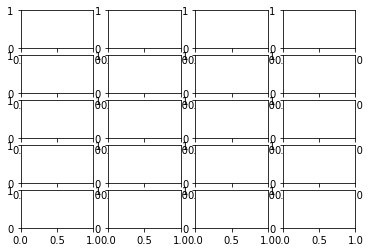

In [33]:
fig, ax = plt.subplots(5,4)

In [68]:
ax[4]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f076425fad0>,
      dtype=object)

In [76]:
class FeatureMap():
    '''
        Extract the feature maps passing through the Convolution layers 
    '''
    
    def __init__(self, CNNmodel):
        '''
            예외처리 나중에 TODO
        '''
        self.__model = CNNmodel
        self.Feature_Model = False
        self.__Output_Layer_Flag = False
        self.__layer_outputs = None
        self.__layer_names = None
        self.__Activations = None
        self.__Specialist = 10  # 이 Private 멤버변수들의 이름은 쓸 수는 있지만, 여기 있는 멤버변수 값들에는 전혀 영향이 없음!!
                                # 내부에서 이 private 멤버변수를 참조하는 멤버함수들도, 여기 명시된 private 멤버변수만 가지고 사용함! 
                                # 당연하지만, 그래서 일반적으로 클래스 외부에서는 __[변수이름] 따위의 이름표기를 쓰지 않음. 
        self.Commonlist = 5
    
    def __Output_Layer(self):
        for idx, layer in enumerate(self.__model.layers):
            if "Flatten" in str(layer):
                break

        self.__layer_outputs = [ layer.output for layer in self.__model.layers[:idx]]
        self.__layer_names = [ layer.name for layer in self.__model.layers[:idx]]
        self.__Output_Layer_Flag = True
        return 
    
    def Create_Feature_Model(self):
        if not self.__Output_Layer_Flag:
            self.__Output_Layer()
            Activation_model = models.Model(inputs=self.__model.input, outputs=self.__layer_outputs)
            self.Feature_Model = Activation_model
        return
    
    def Actuate_Feature_Model(self, Sample_Img):
        if not self.Feature_Model:
            return "Create_Feature_Model을 먼저 하세요."
        if len(Sample_Img.shape) != 4:
            print(f"샘플이미지의 shape은 (1, ?, ?, ?)이어야 한다. 그런데 {Sample_Img.shape}이 들어왔음. \n np.expand_dims(Sample_Img, axis=0) 사용(?)")
            return
        Activations = self.Feature_Model.predict(Sample_Img)
        self.__Activations = Activations
        return 
        # TODO
    
    def Feature_Maps_Show(self, n_cols=8, cmap=cmap, norm=norm):
        '''
            우선 Conv를 지나고 바로 직후의 Feature Maps를 뽑아내도록 만들었음.
            (Pooling, Batch_Norm, Activation_Func 바로 직후는 볼 수 없음)
        '''
        n_cols = n_cols
        
        for layer_name, layer_activation in zip(self.__layer_names, self.__Activations): # Displays the feature maps
            if 'conv' not in layer_name:
                continue
            
            n_features = layer_activation.shape[-1] # Number of features in the feature map
            if n_features % n_cols != 0:
                n_rows = int(n_features/n_cols) + 1
            else: n_rows = n_features // n_cols # Tiles the activation channels in this matrix

            fig, axe = plt.subplots(n_rows, n_cols, figsize=(15, 15))
            fig.suptitle(layer_name, fontsize=30)
            idx = 1
            itr_checkpoint = 1
            for ax_row in axe:
                for ax_col in ax_row:
                    if itr_checkpoint == n_features+1:
                        break
                    ax_col.set_xticks([])
                    ax_col.set_yticks([])
                    vmin = np.percentile(layer_activation[0,:,:,idx-1], 30)
                    vmax = np.percentile(layer_activation[0,:,:,idx-1], 100)
                    ax_col.imshow(layer_activation[0,:,:,idx-1], vmax=vmax, vmin=vmin, cmap=cmap, norm=norm)
                    idx += 1
                    itr_checkpoint += 1
            fig.tight_layout()
            fig.subplots_adjust(top=0.88)
            plt.show()
            
        return 

In [70]:
Test = Feature_Map(model)

In [39]:
model.input

<tf.Tensor 'conv2d_12_input:0' shape=(?, 200, 200, 3) dtype=float32>

In [62]:
Test.__Specialist = 300

In [63]:
Test.__Specialist

300

In [61]:
Test.Commonlist

5

In [64]:
Test.test_mem_var()

15

In [31]:
Test.__Output_Layer()

AttributeError: 'Feature_Map' object has no attribute '__Output_Layer'

In [25]:
Test.public_var = 10

In [26]:
Test.public_var

10

In [27]:
Test.__private = 10

In [29]:
print(Test.__private)

10


In [18]:
type(Test)

__main__.Feature_Map

In [19]:
Test.Create_Feature_Model()

In [20]:
Test.Actuate_Feature_Model(img_tensor)

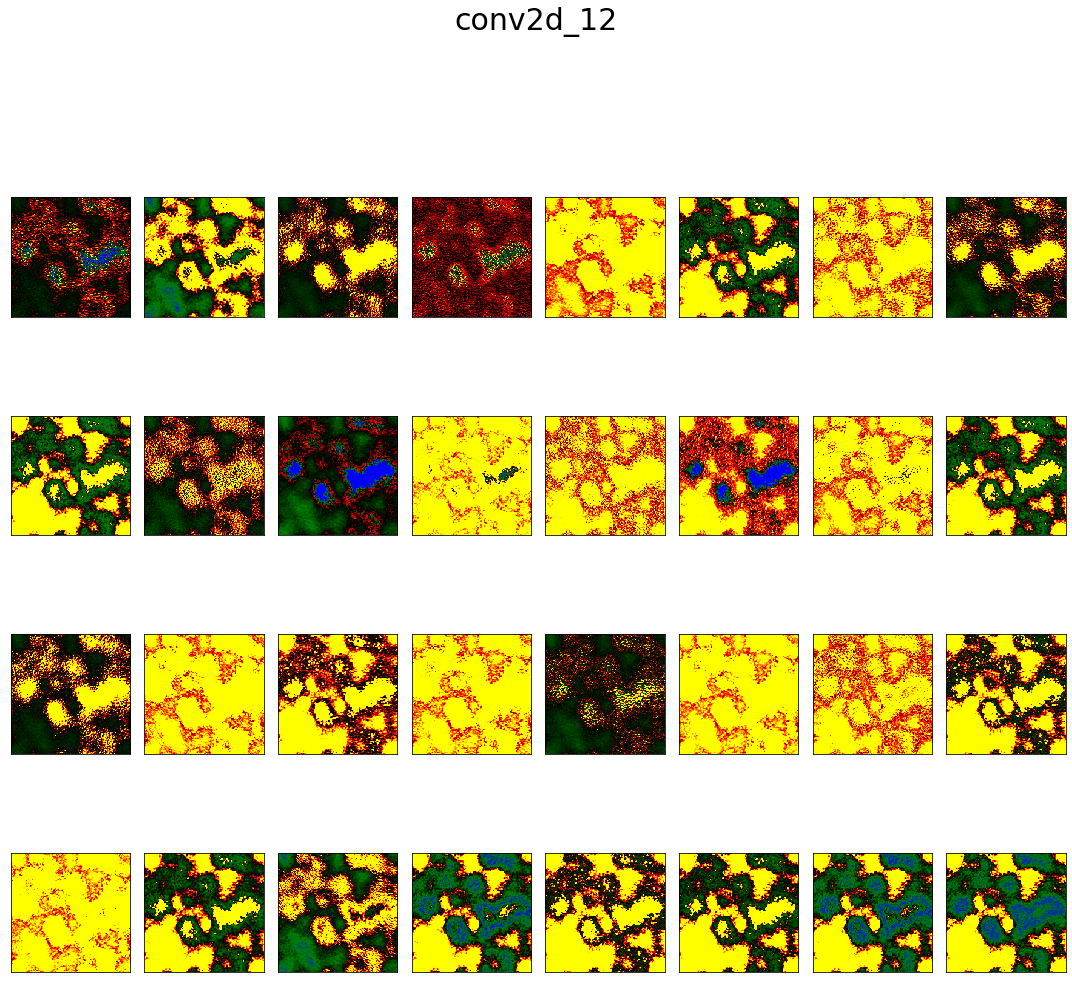

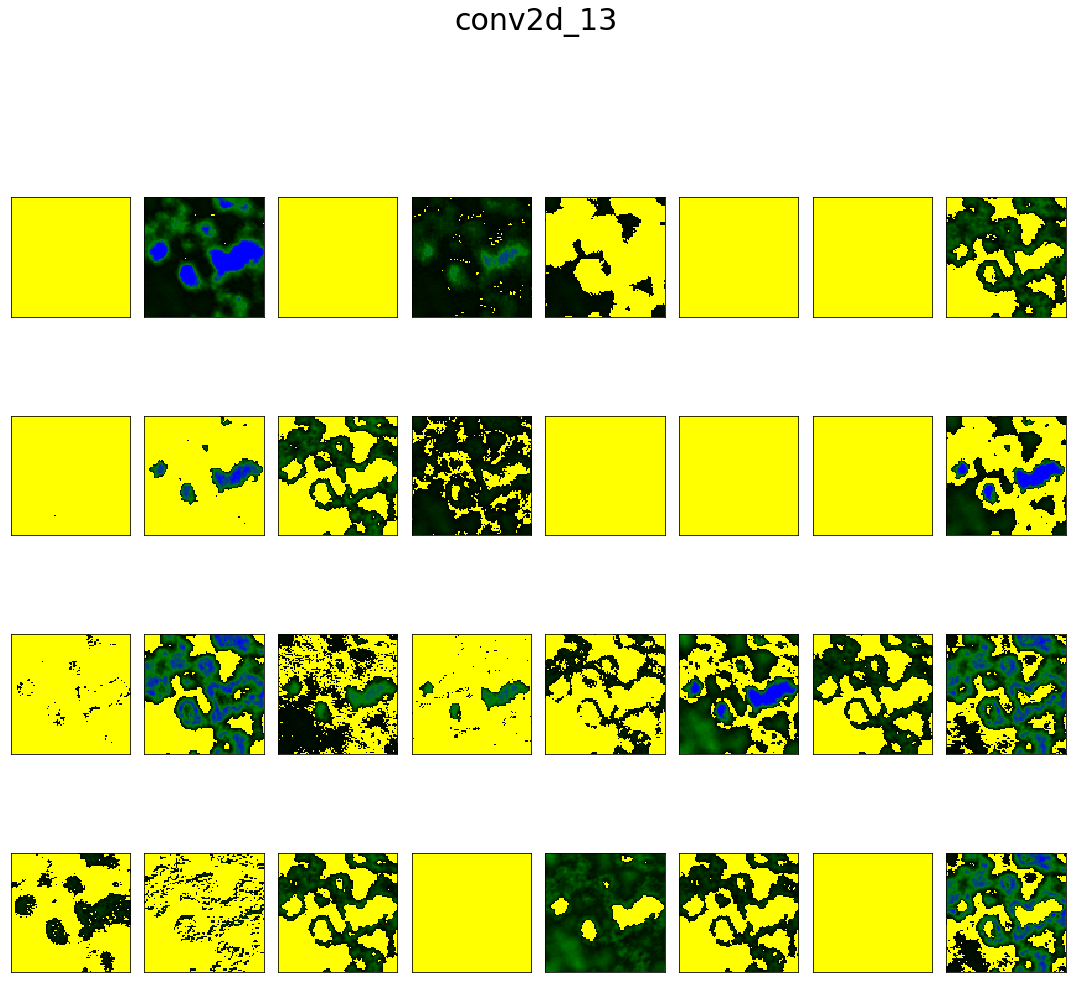

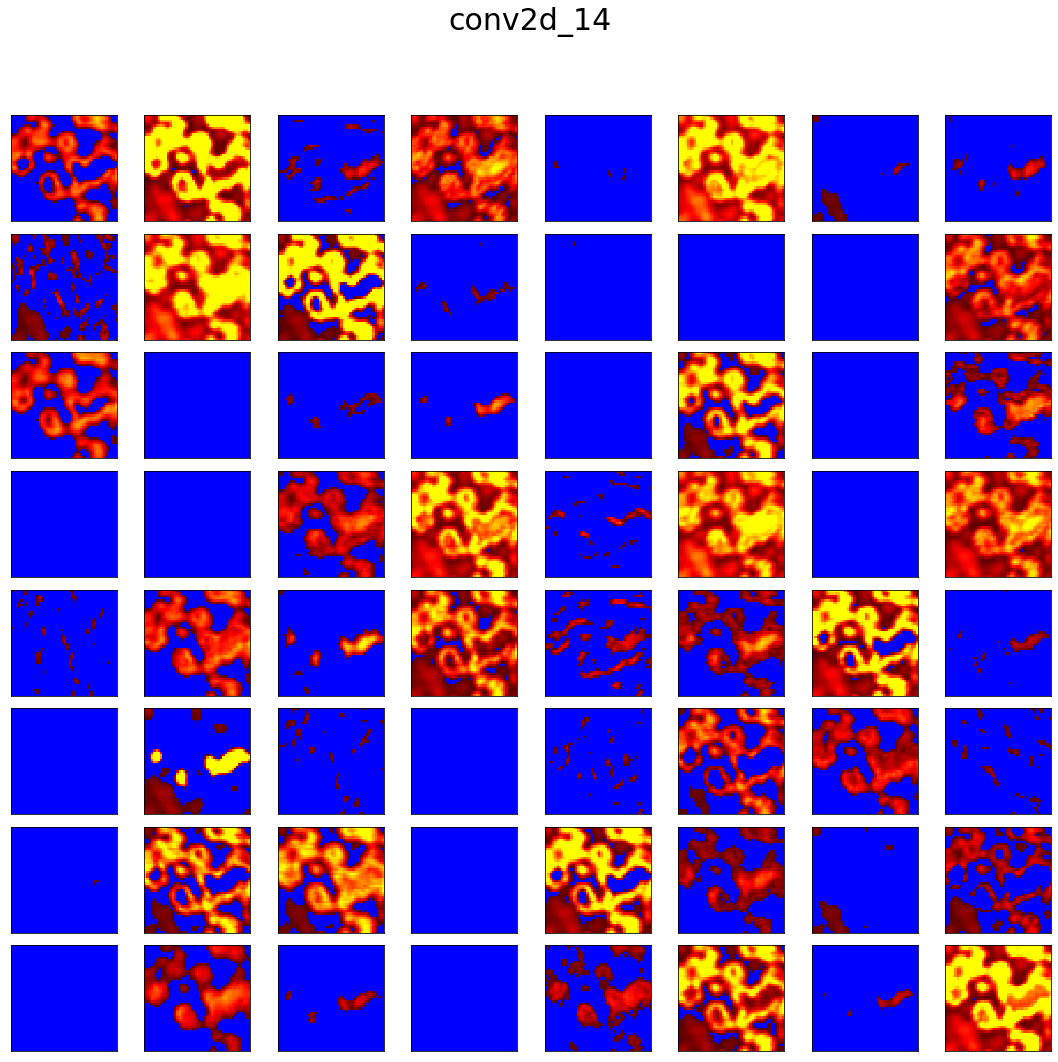

In [21]:
Test.Feature_Maps_Show(cmap=cmap, norm=norm)

In [86]:
for idx, layer in enumerate(model.layers):
    if "Flatten" in str(layer):
        print(idx)
    

12


In [4]:
layer_outputs = [layer.output for layer in model.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [24]:
layer_outputs

[<tf.Tensor 'conv2d/BiasAdd:0' shape=(?, 198, 198, 32) dtype=float32>,
 <tf.Tensor 'batch_normalization/cond/Merge:0' shape=(?, 198, 198, 32) dtype=float32>,
 <tf.Tensor 'activation/Relu:0' shape=(?, 198, 198, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d/MaxPool:0' shape=(?, 99, 99, 32) dtype=float32>,
 <tf.Tensor 'conv2d_1/BiasAdd:0' shape=(?, 97, 97, 32) dtype=float32>,
 <tf.Tensor 'batch_normalization_1/cond/Merge:0' shape=(?, 97, 97, 32) dtype=float32>,
 <tf.Tensor 'activation_1/Relu:0' shape=(?, 97, 97, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(?, 48, 48, 32) dtype=float32>,
 <tf.Tensor 'conv2d_2/BiasAdd:0' shape=(?, 46, 46, 64) dtype=float32>,
 <tf.Tensor 'batch_normalization_2/cond/Merge:0' shape=(?, 46, 46, 64) dtype=float32>,
 <tf.Tensor 'activation_2/Relu:0' shape=(?, 46, 46, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 23, 23, 64) dtype=float32>]

In [6]:
# img_tensor = np.load("/home/zoshs2/tf_gpu/Re/DATA/BS1_BW02_WG_RGB_10318.npy") # 노이즈 들어간거
# img_tensor = np.load("/home/zoshs2/tf_gpu/Re/DATA/BS1_BW02_NN_RGB_10318.npy") # 노이즈 안들어간거
img_tensor = np.load("/home/zoshs2/tf_gpu/Re/DATA/BS3_BW02_WG_RGB_10318.npy")

In [27]:
print(img_tensor['z'][330], img_tensor['xH'][330])

11.93 0.97279953956604


In [7]:
# img_tensor = img_tensor['Img'][1940]
img_tensor = img_tensor['Img'][330]

In [23]:
img_tensor['Img'][330]

array([[[41,  0,  0],
        [58,  0,  0],
        [47,  0,  0],
        ...,
        [36,  0,  0],
        [27,  0,  0],
        [26,  0,  0]],

       [[36,  0,  0],
        [46,  0,  0],
        [33,  0,  0],
        ...,
        [30,  0,  0],
        [44,  0,  0],
        [57,  0,  0]],

       [[37,  0,  0],
        [32,  0,  0],
        [41,  0,  0],
        ...,
        [30,  0,  0],
        [42,  0,  0],
        [59,  0,  0]],

       ...,

       [[32,  0,  0],
        [49,  0,  0],
        [57,  0,  0],
        ...,
        [47,  0,  0],
        [26,  0,  0],
        [37,  0,  0]],

       [[34,  0,  0],
        [22,  0,  0],
        [57,  0,  0],
        ...,
        [54,  0,  0],
        [41,  0,  0],
        [57,  0,  0]],

       [[44,  0,  0],
        [59,  0,  0],
        [50,  0,  0],
        ...,
        [48,  0,  0],
        [39,  0,  0],
        [44,  0,  0]]])

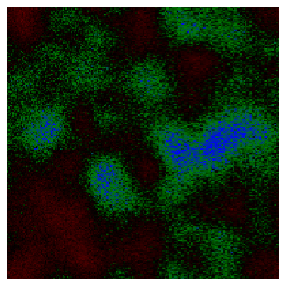

In [9]:
fig = plt.figure(figsize=(5,5))
plt.imshow(img_tensor)
plt.axis("off")
# plt.show()
plt.savefig("BS3_BW02_Sample_F_map.pdf", bbox_inches='tight', pad_inches=0, dpi=150)

In [8]:
img_tensor = np.expand_dims(img_tensor, axis=0)

In [9]:
img_tensor.shape

(1, 200, 200, 3)

In [12]:
activations = activation_model.predict(img_tensor)

In [13]:
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

In [14]:
layer_names

['conv2d_12',
 'batch_normalization_20',
 'activation_24',
 'max_pooling2d_12',
 'conv2d_13',
 'batch_normalization_21',
 'activation_25',
 'max_pooling2d_13',
 'conv2d_14',
 'batch_normalization_22',
 'activation_26',
 'max_pooling2d_14']

In [65]:
for X in activations:
    print(X[0].shape)
    #print(f"max is {X.max()}")
    #print(f"min is {X.min()}")
    #print(f"shape is {X.shape}")

(198, 198, 32)
(198, 198, 32)
(198, 198, 32)
(99, 99, 32)
(97, 97, 32)
(97, 97, 32)
(97, 97, 32)
(48, 48, 32)
(46, 46, 64)
(46, 46, 64)
(46, 46, 64)
(23, 23, 64)


In [56]:
cnt = 0
for _ in activations:
    cnt += 1
print(cnt)

12


In [28]:
layer_names

['conv2d_12',
 'batch_normalization_20',
 'activation_24',
 'max_pooling2d_12',
 'conv2d_13',
 'batch_normalization_21',
 'activation_25',
 'max_pooling2d_13',
 'conv2d_14',
 'batch_normalization_22',
 'activation_26',
 'max_pooling2d_14']

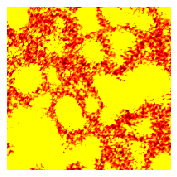

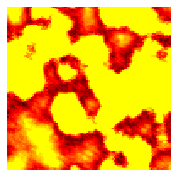

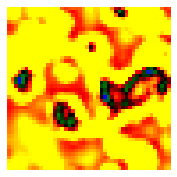

In [18]:
# mean_img = np.mean(activations[0][0], axis=(2))
# plt.clf()
# plt.imshow(mean_img, cmap=cmap, norm=norm)
# plt.show()

for layer_name, layer_activation in zip(layer_names, activations):
    if "conv" not in layer_name:
        continue
    plt.figure(figsize=(3,3))
    Img = layer_activation[0]
    Mean_Img = np.mean(Img, axis=(2))
    vmin = np.percentile(Mean_Img, 50)
    vmax = np.percentile(Mean_Img, 100)
    plt.imshow(Mean_Img, vmax=vmax, vmin=vmin, cmap=cmap, norm=norm)
    plt.axis("off")
    plt.show()
    # plt.savefig(f"F_Maps_Avg_{layer_name}.pdf", bbox_inches='tight')

(1, 198, 198, 32)


/home/zoshs2/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(1, 97, 97, 32)
(1, 46, 46, 64)


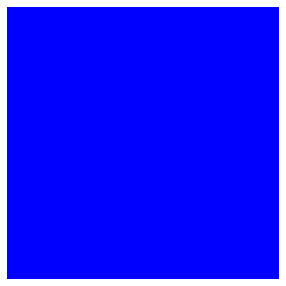

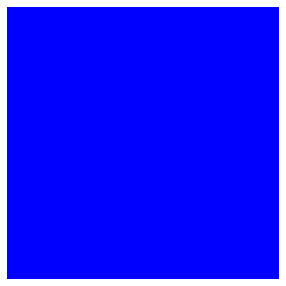

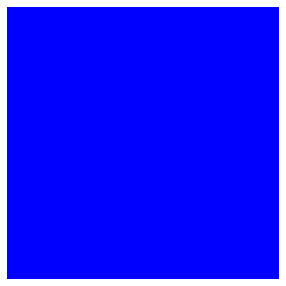

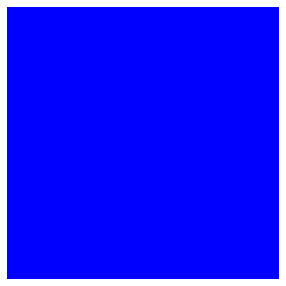

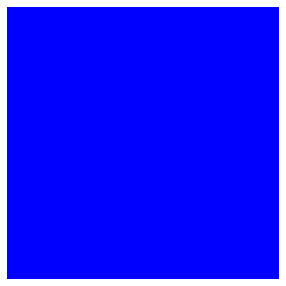

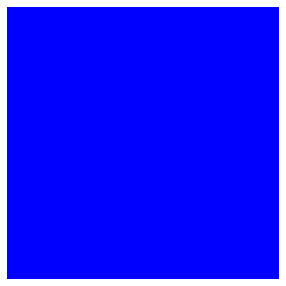

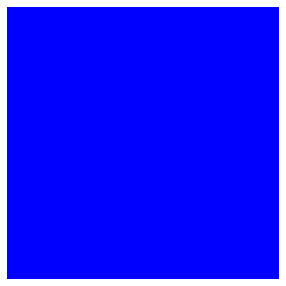

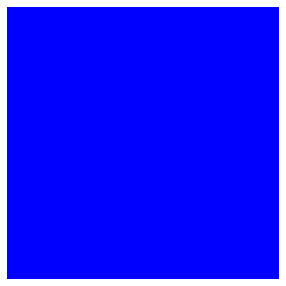

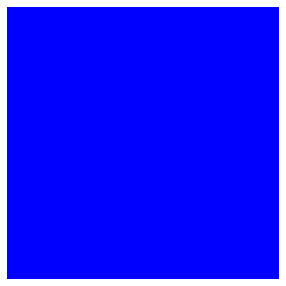

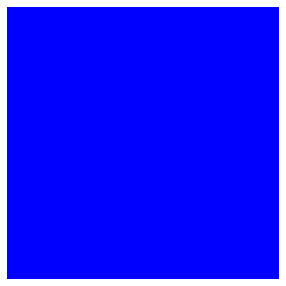

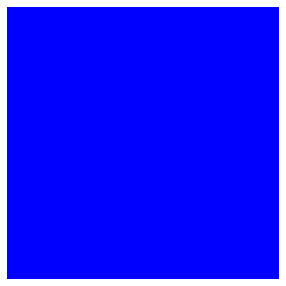

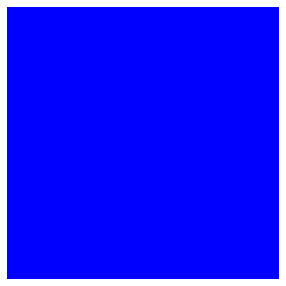

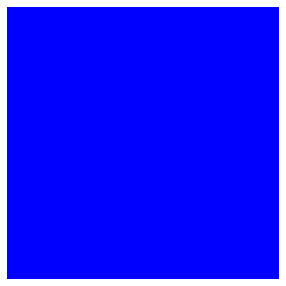

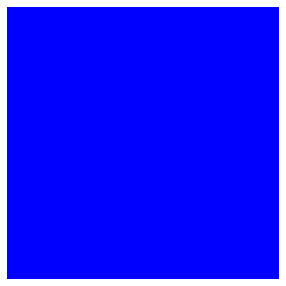

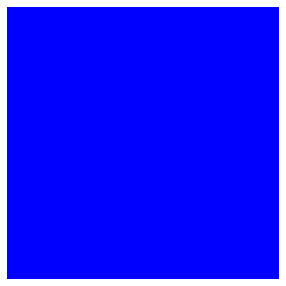

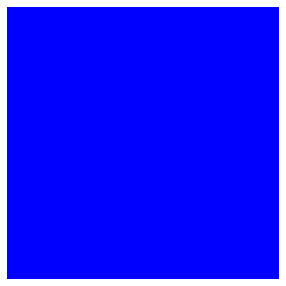

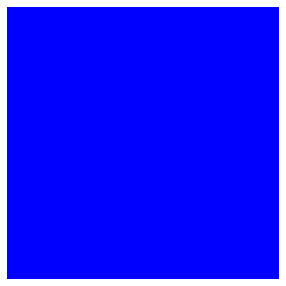

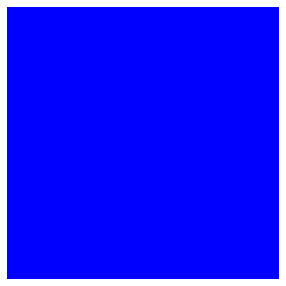

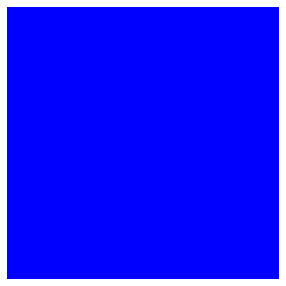

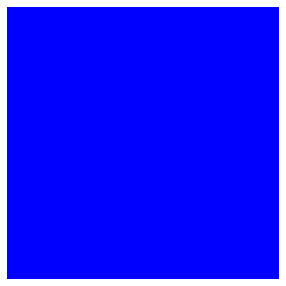

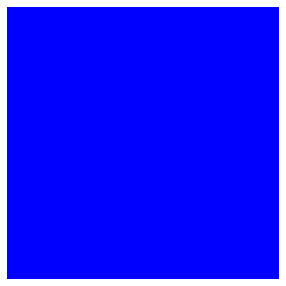

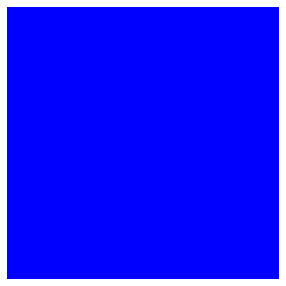

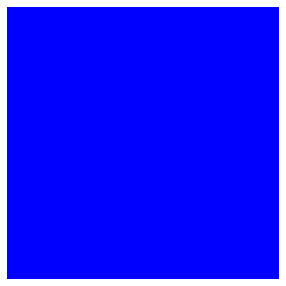

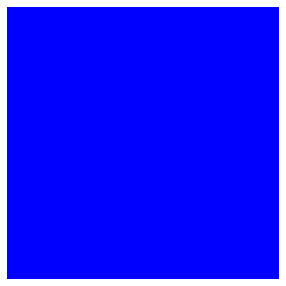

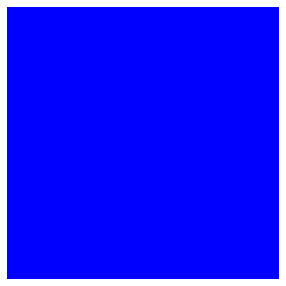

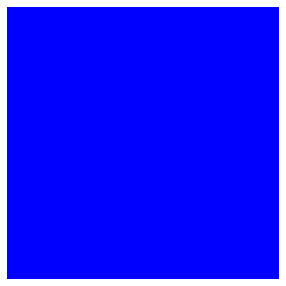

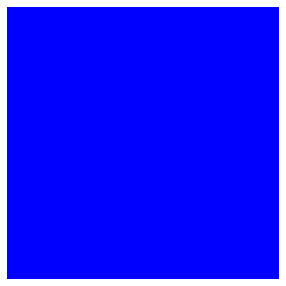

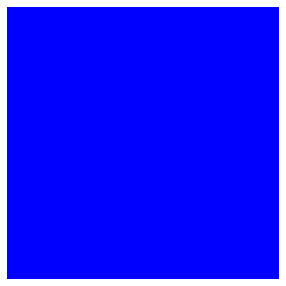

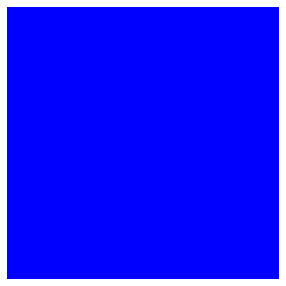

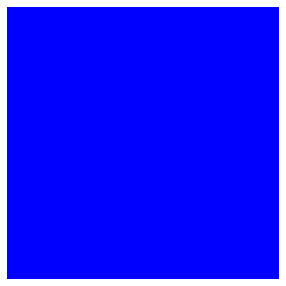

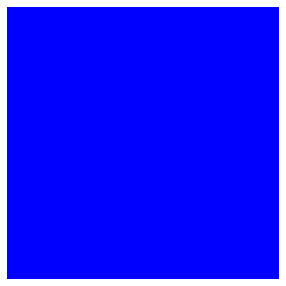

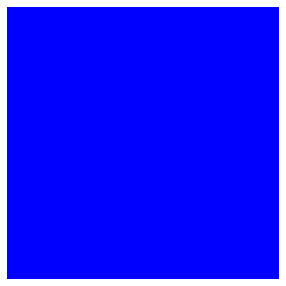

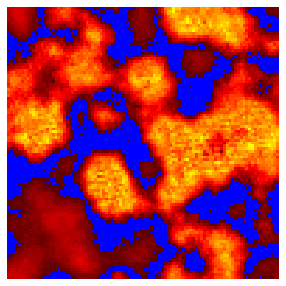

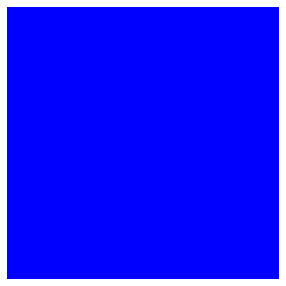

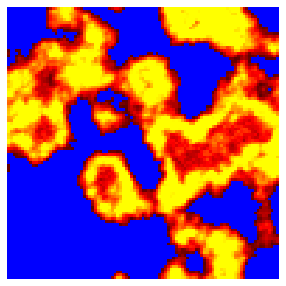

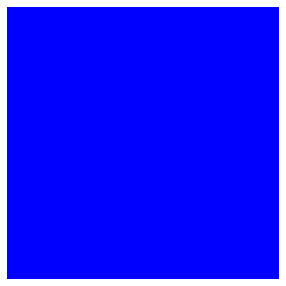

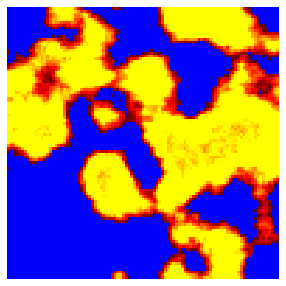

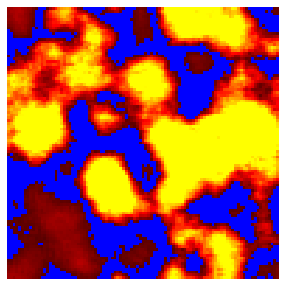

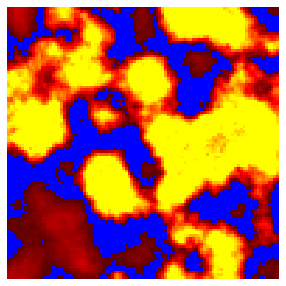

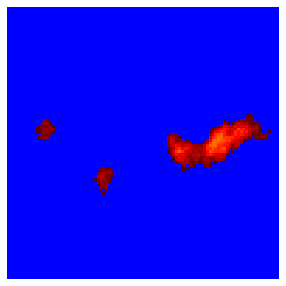

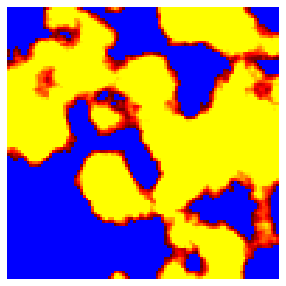

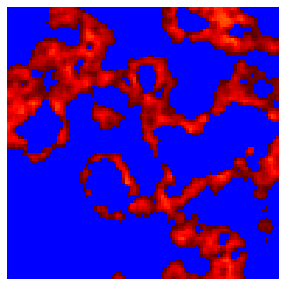

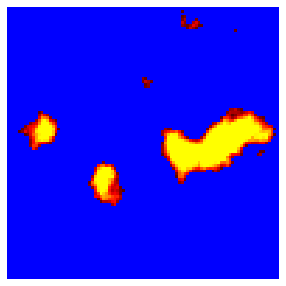

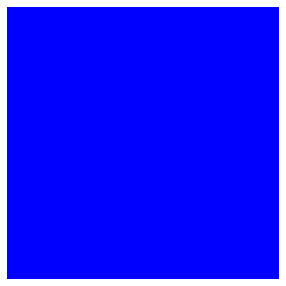

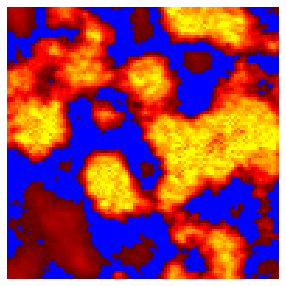

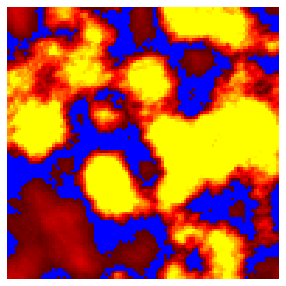

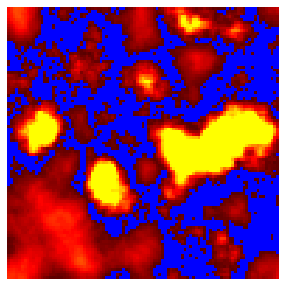

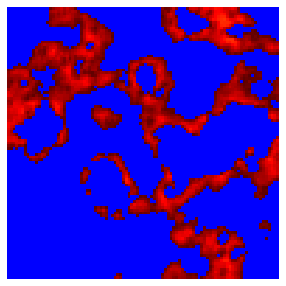

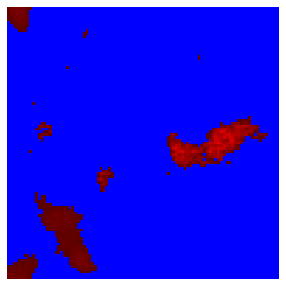

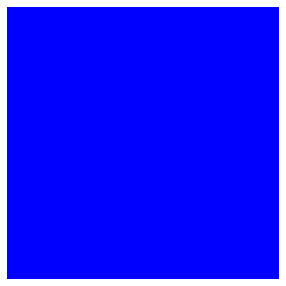

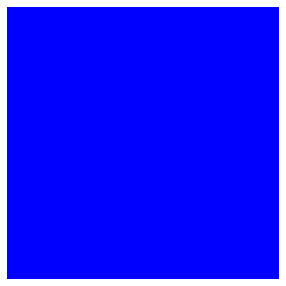

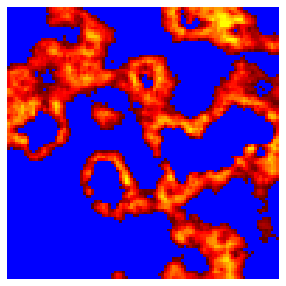

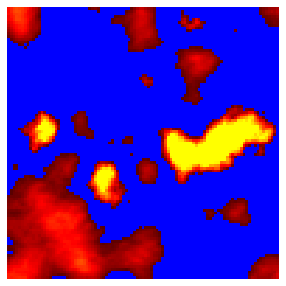

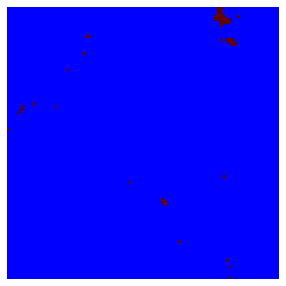

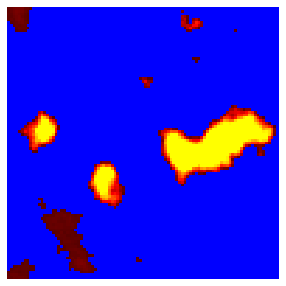

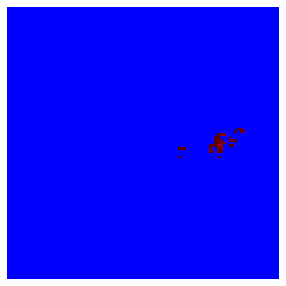

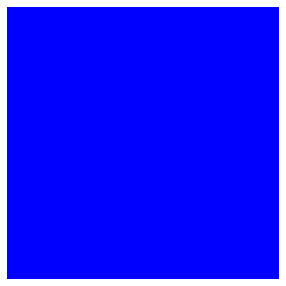

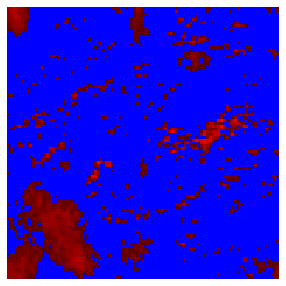

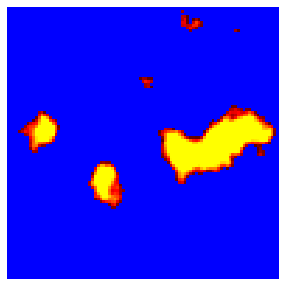

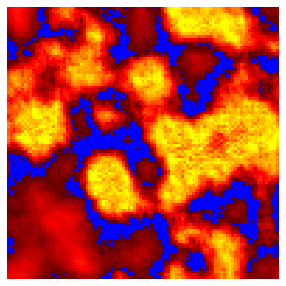

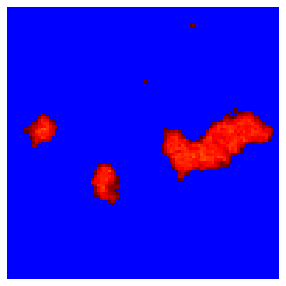

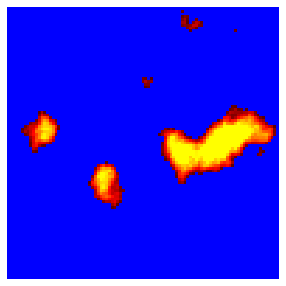

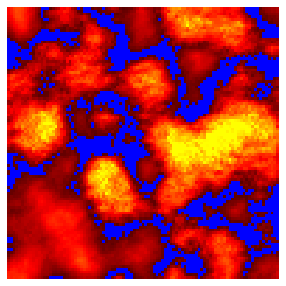

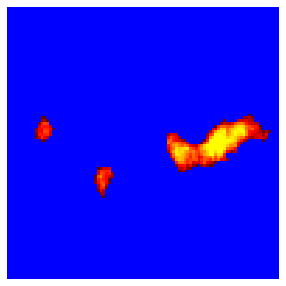

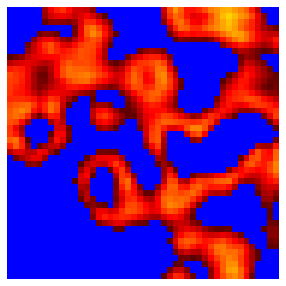

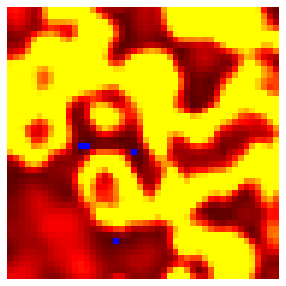

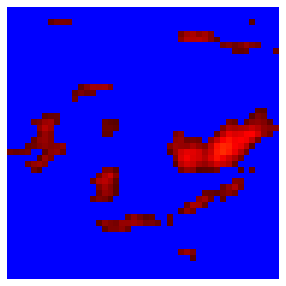

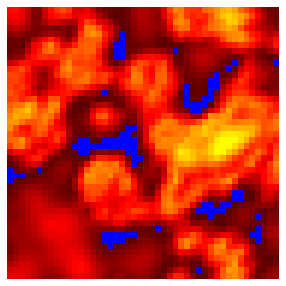

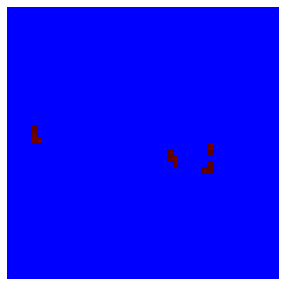

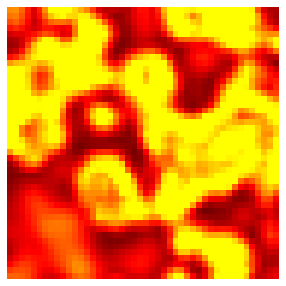

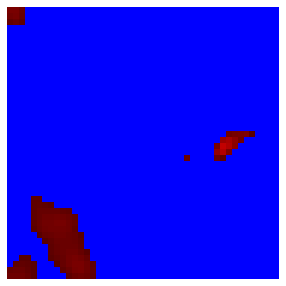

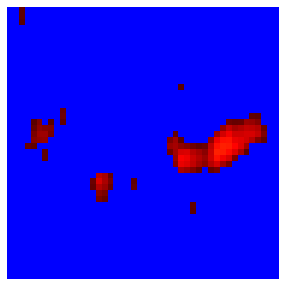

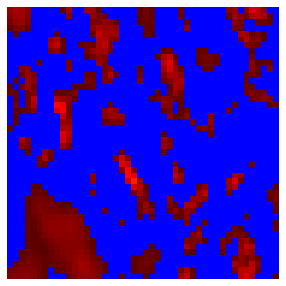

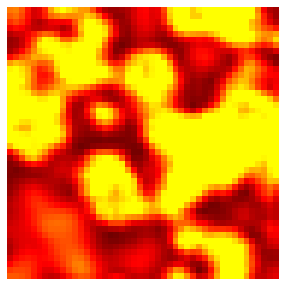

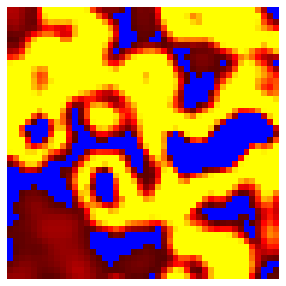

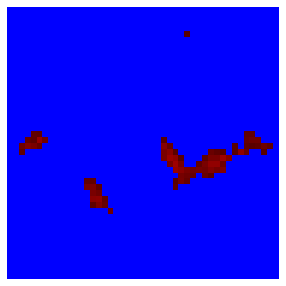

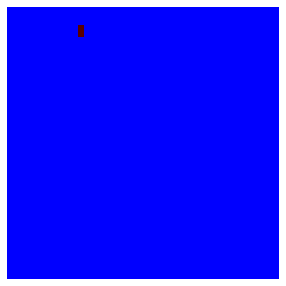

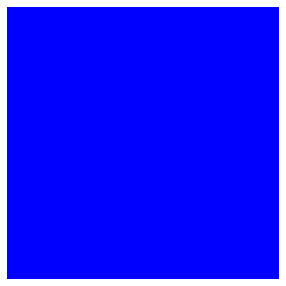

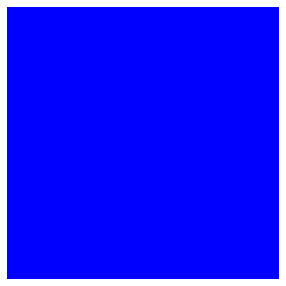

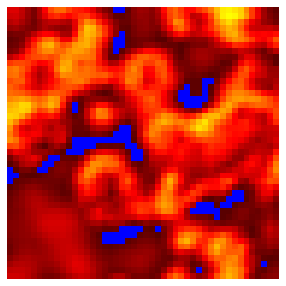

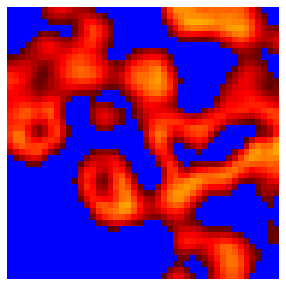

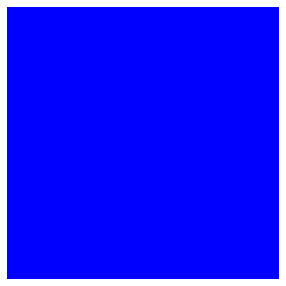

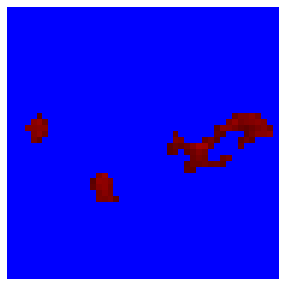

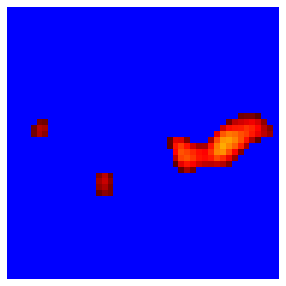

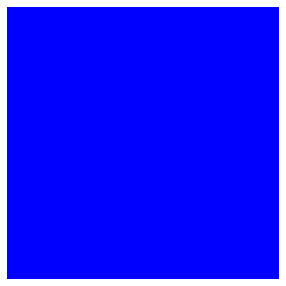

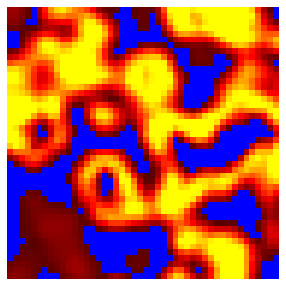

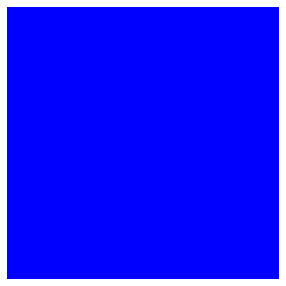

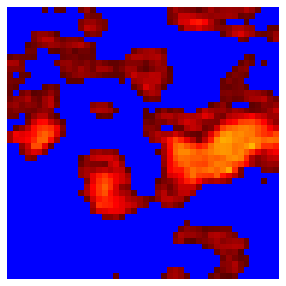

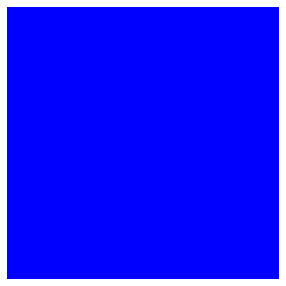

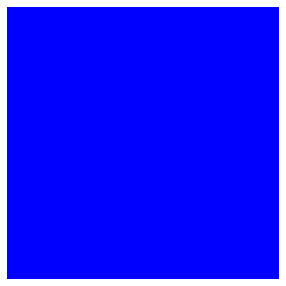

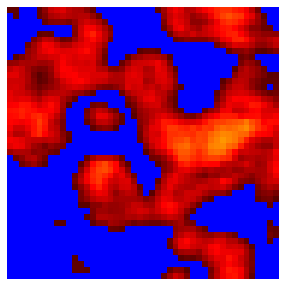

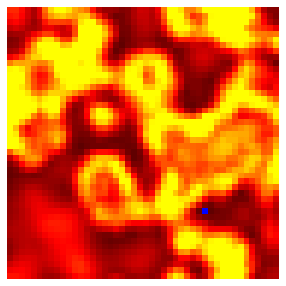

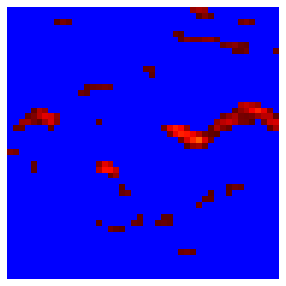

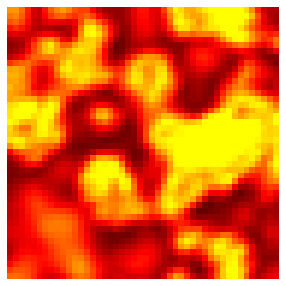

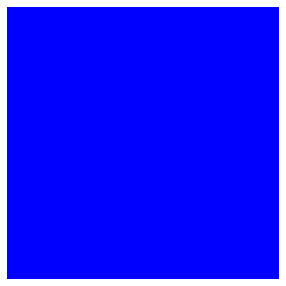

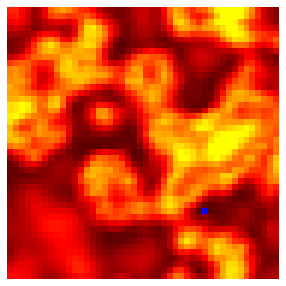

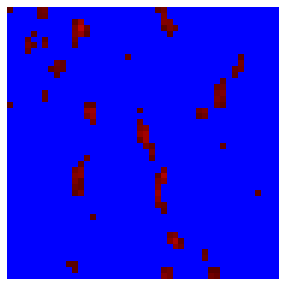

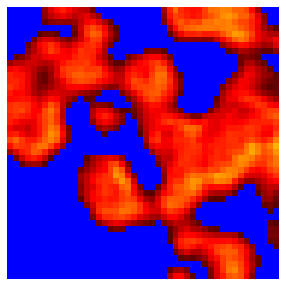

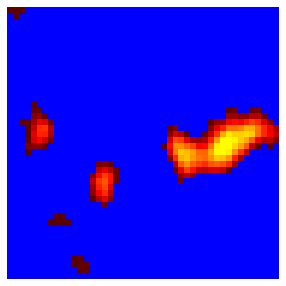

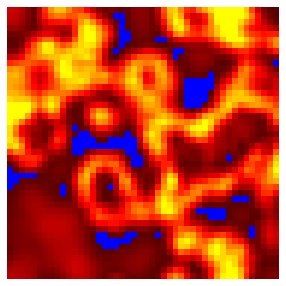

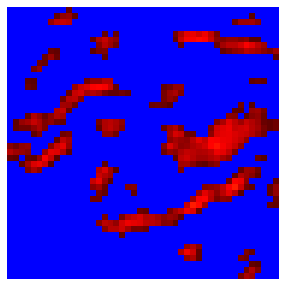

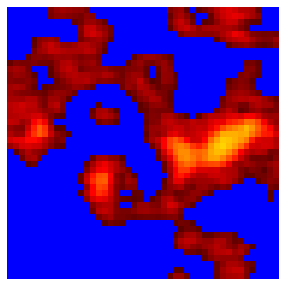

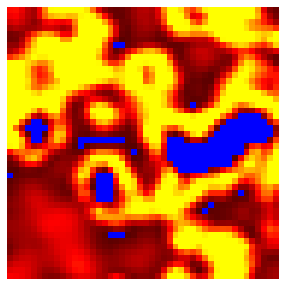

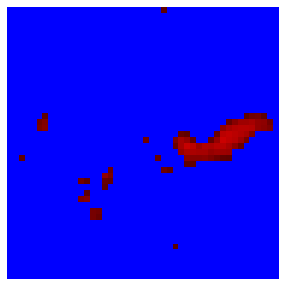

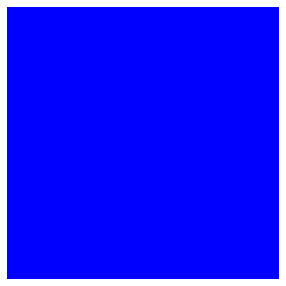

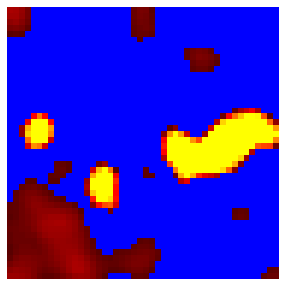

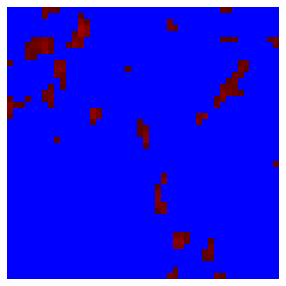

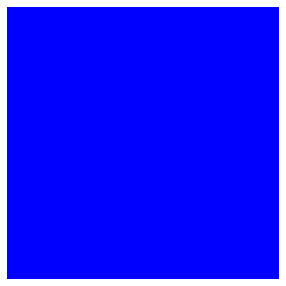

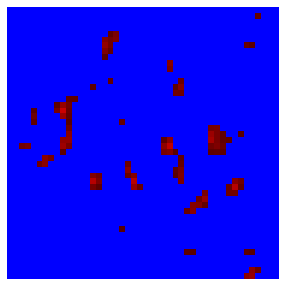

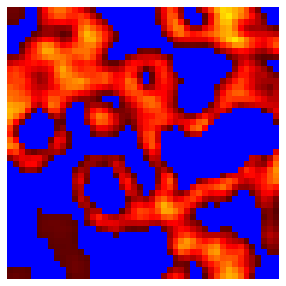

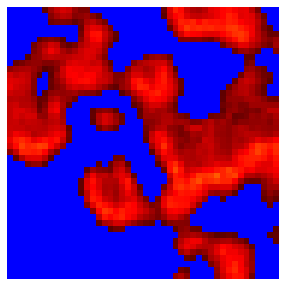

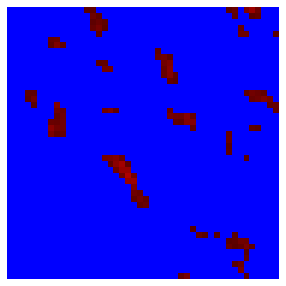

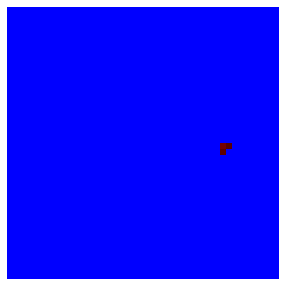

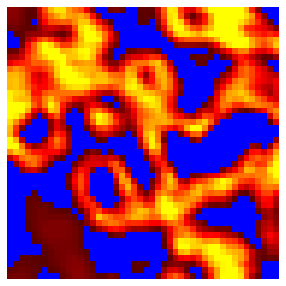

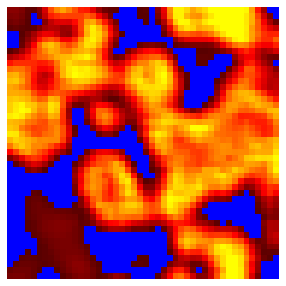

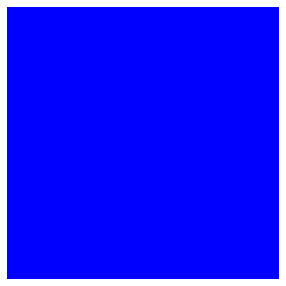

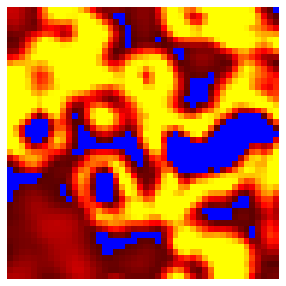

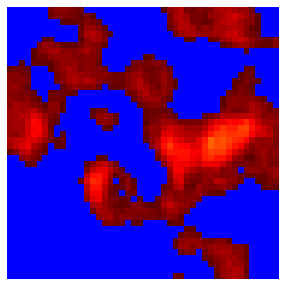

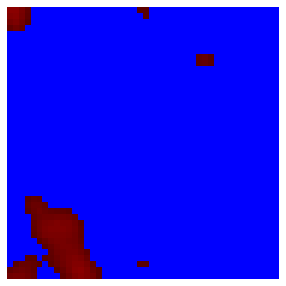

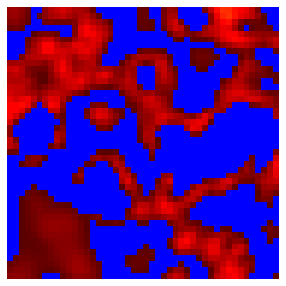

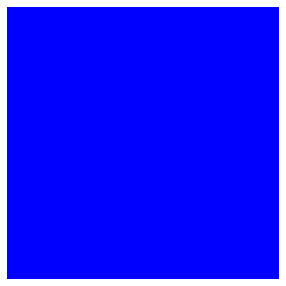

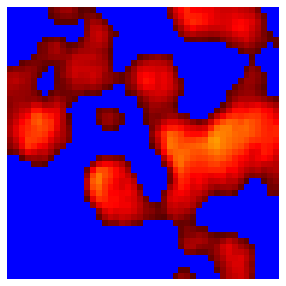

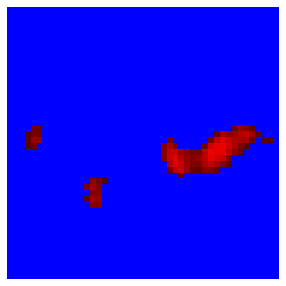

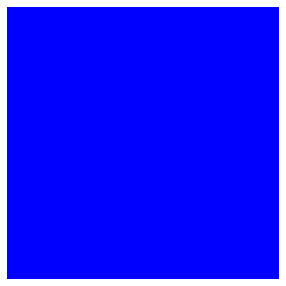

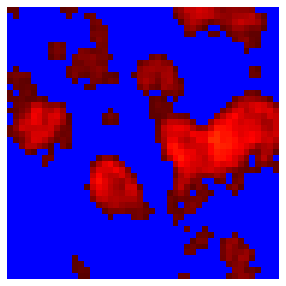

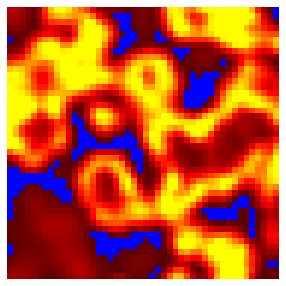

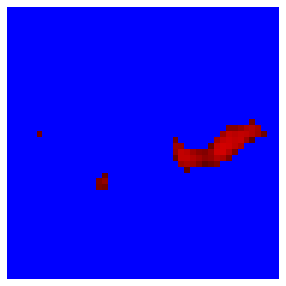

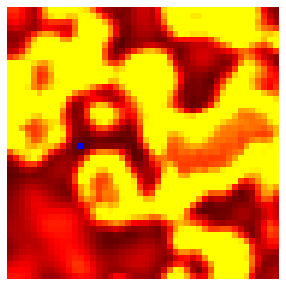

In [26]:
for layer_name, layer_activation in zip(layer_names, activations):
    if "conv" not in layer_name:
        continue
    print(layer_activation.shape)
    idx = 1
    n_features = layer_activation.shape[-1] # the number of features map
    
    for _ in range(n_features):
        plt.figure(figsize=(5,5))
        # plt.xticks([])
        # plt.yticks([])
        vmin = np.percentile(layer_activation[0,:,:,idx-1], 30)
        vmax = np.percentile(layer_activation[0,:,:,idx-1], 100)
        plt.imshow(layer_activation[0,:,:,idx-1], vmax=vmax, vmin=vmin, cmap=cmap, norm=norm)
        plt.axis("off")
        plt.grid(False)
        plt.savefig(f"/home/zoshs2/tf_gpu/Re/FeatureMaps/{layer_name}_{idx}th_Feature_Map.pdf", bbox_inches='tight', dpi=150)
        idx += 1
        

(1, 198, 198, 32)


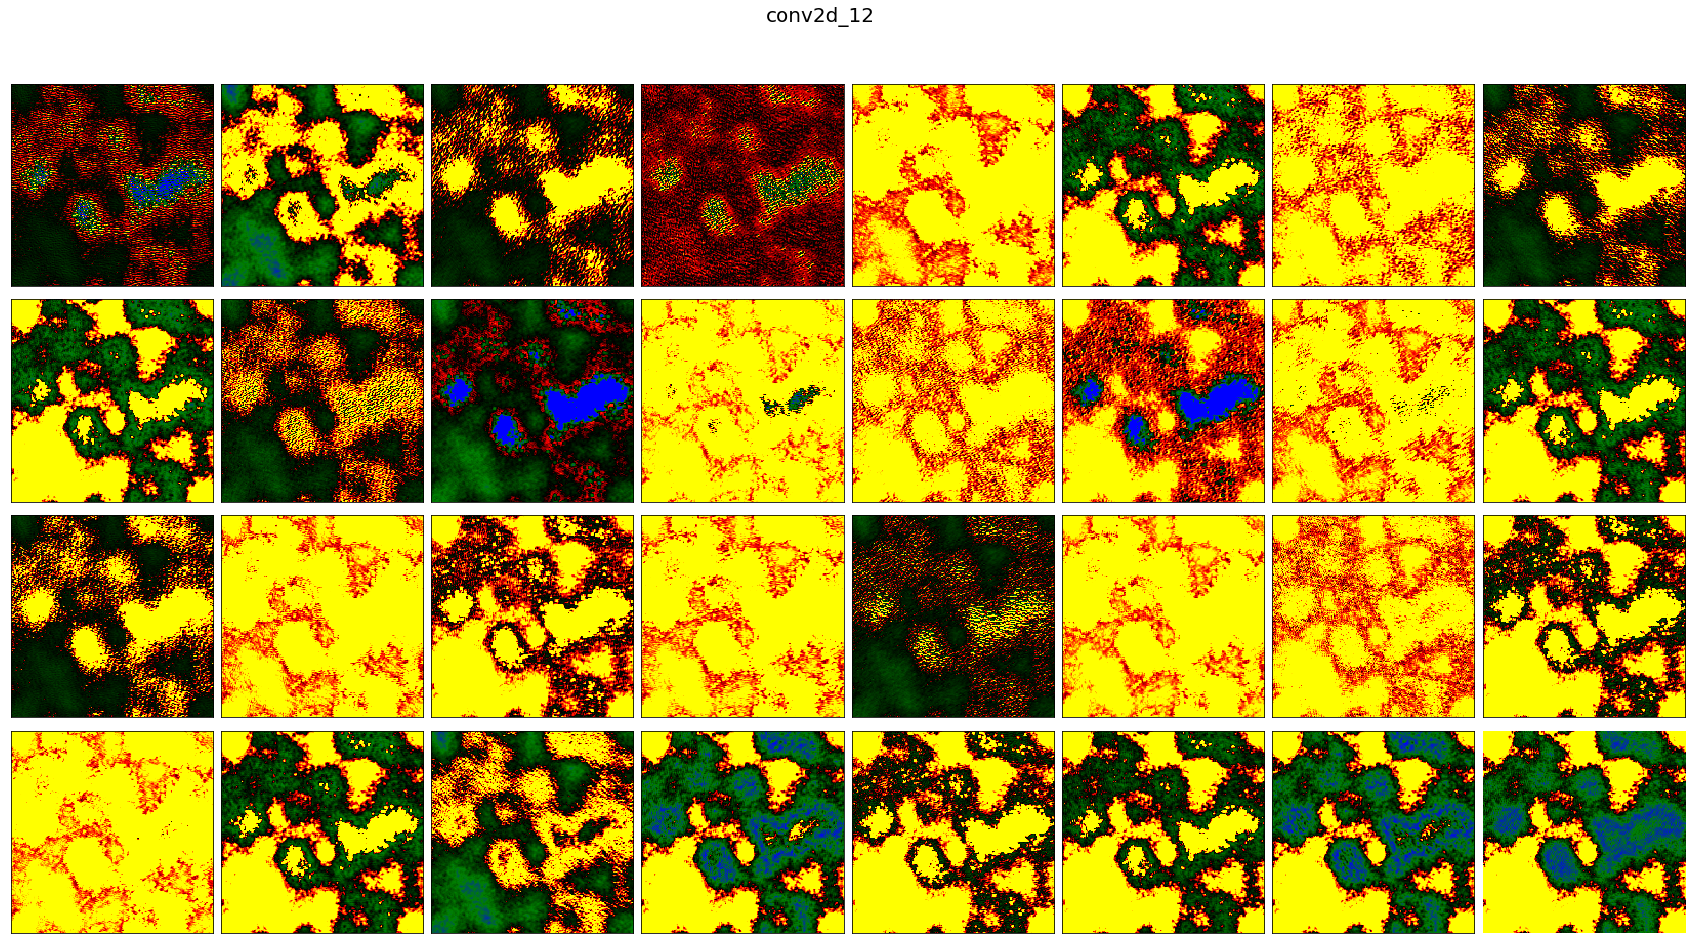

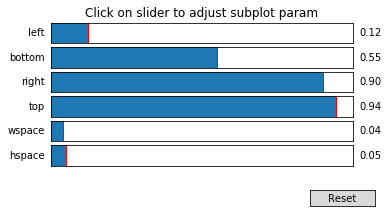

In [21]:
# Type 1
n_cols = 8
ix = 1
#plt.clf()
#plt.cla()
#plt.close()
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    if 'conv' not in layer_name:
        continue
    print(layer_activation.shape)
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    # size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_rows = n_features // n_cols # Tiles the activation channels in this matrix
    # display_grid = np.zeros((size * n_cols, images_per_row * size))
    idx = 1
    fig = plt.figure(figsize=(30,30))
    for _ in range(n_rows): # Tiles each filter into a big horizontal grid
        for _ in range(n_cols):
            ax = plt.subplot(n_rows, n_cols, idx)
            ax.set_xticks([])
            ax.set_yticks([])
            vmin = np.percentile(layer_activation[0,:,:,idx-1], 30)
            vmax = np.percentile(layer_activation[0,:,:,idx-1], 100)
            im = plt.imshow(layer_activation[0,:,:,idx-1], vmax=vmax, vmin=vmin, cmap=cmap, norm=norm)
            idx += 1
            # channel_image = layer_activation[0, :, :, col * images_per_row + row]
            # channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            # channel_image /= channel_image.std()
            # channel_image *= 64
            # channel_image += 128
            # channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            # display_grid[col * size : (col + 1) * size, # Displays the grid
            #              row * size : (row + 1) * size] = channel_image
    # scale = 1. / size
    # plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    # fig.colorbar(im)
    #plt.subplots_adjust(right=.95, bottom=0.05, top=.95, hspace=0.05, wspace=.04) # 8 x 8 에 적절한 수치
    plt.subplots_adjust(right=.9, bottom=0.55, top=0.945, hspace=0.05, wspace=.04) # 8 x 4 에 적절한 수치
    plt.subplot_tool()
    # plt.colorbar(im)
    fig.suptitle(layer_name, fontsize=20)
    plt.grid(False)
    plt.axis("off")
    
    #if ix == 3:
    #    plt.savefig("Percent30_100_F_Maps_{}_BS3_BW2_330_0th_CheckModel.pdf".format(layer_name))
    plt.show()
    ix += 1
    break
    # plt.imshow(display_grid, aspect='auto', cmap=cmap, norm=norm)
    # plt.savefig("Feature_maps_{}_BS1_BW02_RGB_1940_1th_CheckedModel.pdf".format(layer_name))

In [51]:
65//32layer_activation

2

In [42]:
layer_names

['conv2d_3',
 'batch_normalization_5',
 'activation_6',
 'max_pooling2d_3',
 'conv2d_4',
 'batch_normalization_6',
 'activation_7',
 'max_pooling2d_4',
 'conv2d_5',
 'batch_normalization_7',
 'activation_8',
 'max_pooling2d_5']

In [24]:
print(layer_names, " & ", activations)

['conv2d_3', 'batch_normalization_5', 'activation_6', 'max_pooling2d_3', 'conv2d_4', 'batch_normalization_6', 'activation_7', 'max_pooling2d_4', 'conv2d_5', 'batch_normalization_7', 'activation_8', 'max_pooling2d_5']  &  [array([[[[ -79.19228   ,  -60.26745   ,  -82.20938   , ...,
          -227.02127   ,  -22.829424  ,    6.549694  ],
         [ 126.14539   ,  -56.72916   , -115.07801   , ...,
           -55.517937  ,  -93.46113   ,   10.590203  ],
         [  82.15779   , -113.44842   ,   -2.0387812 , ...,
           -86.581116  ,  -24.228342  ,  -60.895905  ],
         ...,
         [  36.27375   , -113.04768   , -136.54024   , ...,
             5.1166663 , -174.83049   ,  -27.741297  ],
         [  57.387524  , -141.63643   ,   68.914     , ...,
          -113.84545   , -140.06776   ,  -72.55716   ],
         [-130.63602   ,  -68.72429   ,   -3.2428217 , ...,
          -152.04948   ,  -78.30504   ,  -61.14184   ]],

        [[  80.20288   ,  -18.736557  ,  -74.078415  , ...,
      

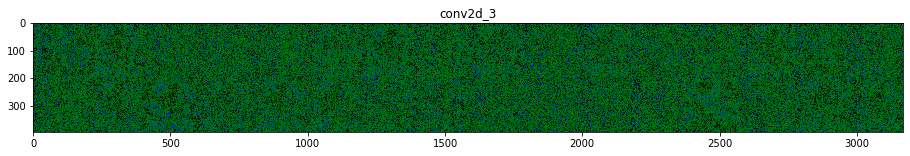

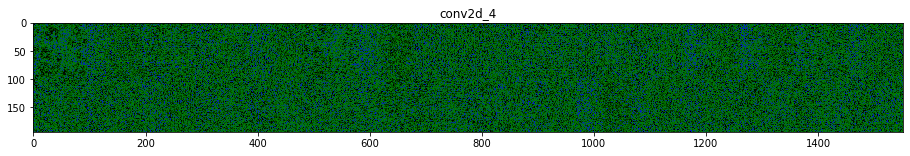

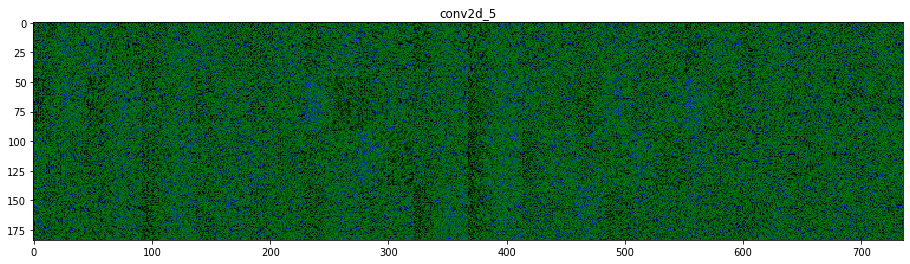

In [27]:
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    if 'conv' not in layer_name:
        continue
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    fig = plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, cmap=cmap, norm=norm)#, aspect='auto'
    # fig.colorbar(im)
    plt.show()
    # plt.savefig("Feature_maps_{}_BS1_BW02_RGB_1940_1th_CheckedModel.pdf".format(layer_name))

In [47]:
%pwd

'/home/zoshs2/tf_gpu/Re'